In [1]:
import pandas as pd
import numpy as np
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from pandas.tools.plotting import parallel_coordinates

import matplotlib as mpl
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid",{"font.sans-serif":['simhei', 'Arial']})

from scipy import stats
import math

In [2]:
xls = pd.ExcelFile('2014年基本信息表.xls')
data_upperHalf = xls.parse('基本信息表2014上半年')
data_lowerHalf = xls.parse('基本信息表2014下半年')
data = pd.DataFrame()
data = pd.concat([data_upperHalf,data_lowerHalf],ignore_index=True)

xls = pd.ExcelFile('2015年基本信息表.xls')
data_upperHalf = xls.parse('基本信息表2015年上半年')
data_lowerHalf = xls.parse('基本信息表2015年上半年')
data = pd.concat([data,data_upperHalf,data_lowerHalf],ignore_index=True)

xls = pd.ExcelFile('2016年基本信息表.xls')
data_upperHalf = xls.parse('2016年上半年基本信息表')
data_lowerHalf = xls.parse('2016年下半年基本信息表')
data = pd.concat([data,data_upperHalf,data_lowerHalf],ignore_index=True)
xls.close()

del data_upperHalf
del data_lowerHalf

In [3]:
#删除事故特征，留下道路特征，环境特征；清洗事故类型特征
data.drop(['事故编号','受伤人数','当事人总数','抢救死亡人数Q','机动车数量','死亡人数',
           '直接财产损失','米数','轻伤人数','重伤人数','非机动车数量','行人数量','路名','事故形态',\
           '单车事故','是否简易程序','路外事故类型','车辆间事故.1','逃逸事故侦破','事故认定原因',\
           '事故认定原因分类小类'],axis=1,inplace=True)
data.drop(['事故初查原因','事故初查原因分类','失踪人数','文书状态',\
           '是否逃逸','调解人1','调解人2','车辆间事故','运载危险品事故后果'],axis=1,inplace=True)
data.drop(['公安部事故编号','所属中队'],axis=1,inplace=True)
data = data[data.事故类型.isin(['简易程序事故','伤人事故','死亡事故','财产损失事故'])]

In [156]:
nan_columns = {}
length_data = len(data)
for i in range(len(data.columns)): 
    odds = sum(data[data.columns[i]].isnull())/length_data
    nan_columns[data.columns[i]] = odds

for i in nan_columns:
    print(i+' : '+str(nan_columns[i]))

中央隔离设施 : 0.967672095405
事故发生时间 : 0.0
事故地点 : 0.0
事故多发点段 : 0.0688483502376
事故类型 : 0.0
交通信号方式（控制） : 0.962027702355
交通标志标线完善 : 0.0
公路行政等级 : 0.705798747841
公里数 : 0.0903102887912
其他交通安全设施不全 : 0.0686292988828
单向路宽 : 0.992445275368
双向路宽 : 0.997300064697
在道路横断面位置 : 0.962027702355
地形 : 0.96205826766
天气 : 0.0
所辖乡镇 : 5.60363930902e-05
损坏机动车数 : 0.0
损坏非机动车数 : 0.0
星期 : 0.0
是否运载危险物品 : 0.0
涉外事故 : 0.0
照明条件 : 0.962027702355
现场 : 0.962027702355
能见度 : 0.962511653023
行政区划 : 0.0
路侧防护设施类型 : 0.96226713058
路口路段类型 : 0.962073550313
路号 : 0.0903051945736
路表情况 : 0.962027702355
路面状况 : 0.962027702355
路面结构 : 0.962063361878
路面附着系数 : 0.999327563283
道路安全属性 : 0.965196305673
道路安全隐患督办等级 : 0.97480399998
道路物理隔离 : 0.962068456095
道路类型 : 0.0903306656614
道路线型 : 0.96205826766
长下坡路段 : 0.0


In [7]:
# data_centerIsolation_notnull = data[data['中央隔离设施'].notnull()]
# for i in range(len(data_centerIsolation_notnull.columns)): 
#     odds = sum(data_centerIsolation_notnull[data_centerIsolation_notnull.columns[i]].isnull())/len(data_centerIsolation_notnull)
#     print('%s:%s'%((data_centerIsolation_notnull.columns)[i],odds))

## 1. 路面附着系数不为空

In [4]:
data_attach_notnull = data[data['路面附着系数'].notnull()]

#设置编号
data_attach_notnull['index']=range(len(data_attach_notnull))
data_attach_notnull.set_index(data_attach_notnull['index'],inplace=True)
data_attach_notnull.drop(['index'],axis=1,inplace=True)

# j = 0
# for i in range(len(data_attach_notnull.columns)): 
#     j += 1
#     odds = sum(data_attach_notnull[data_attach_notnull.columns[i]].isnull())/len(data_attach_notnull)
#     print('%s:%s'%((data_attach_notnull.columns)[i],odds),end='   ')
#     if j%5==0:
#         print()

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [5]:
data_attach_notnull.columns

Index(['中央隔离设施', '事故发生时间', '事故地点', '事故多发点段', '事故类型', '交通信号方式（控制）', '交通标志标线完善',
       '公路行政等级', '公里数', '其他交通安全设施不全', '单向路宽', '双向路宽', '在道路横断面位置', '地形', '天气',
       '所辖乡镇', '损坏机动车数', '损坏非机动车数', '星期', '是否运载危险物品', '涉外事故', '照明条件', '现场',
       '能见度', '行政区划', '路侧防护设施类型', '路口路段类型', '路号', '路表情况', '路面状况', '路面结构',
       '路面附着系数', '道路安全属性', '道路安全隐患督办等级', '道路物理隔离', '道路类型', '道路线型', '长下坡路段'],
      dtype='object')

D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


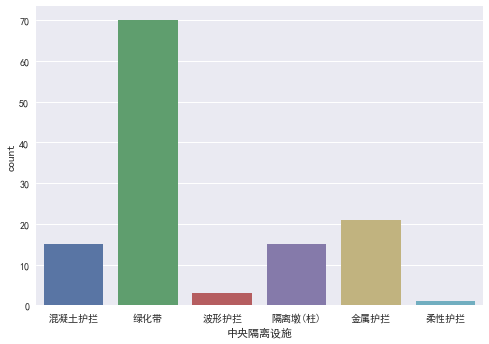

In [5]:
#中央隔离设施,缺失个数为7个，填充缺失值为“绿化带”
sum(data_attach_notnull['中央隔离设施'].isnull())
sns.countplot(data_attach_notnull['中央隔离设施'])
data_attach_notnull['中央隔离设施'].fillna('绿化带',inplace=True)

46

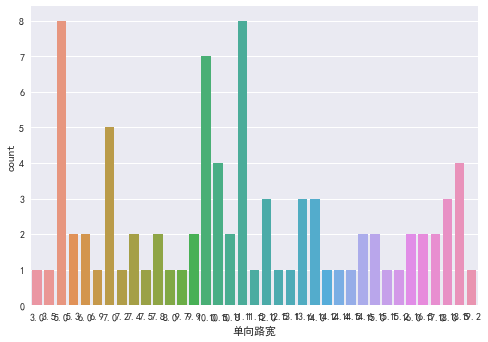

In [6]:
#单向路宽
sns.countplot(data_attach_notnull['单向路宽'])
sum(data_attach_notnull['单向路宽'].isnull())
# plt.plot(data_attach_notnull['单向路宽'])

88

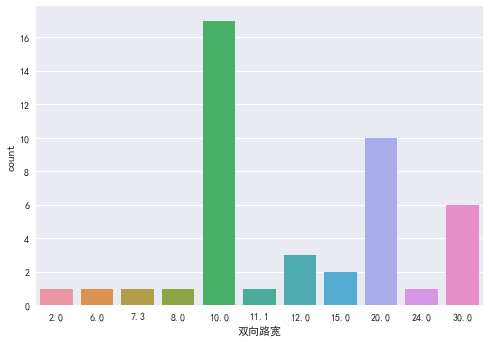

In [7]:
#双向路宽
sns.countplot(data_attach_notnull['双向路宽'])
sum(data_attach_notnull['双向路宽'].isnull())
# plt.plot(data_attach_notnull['单向路宽'])

D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


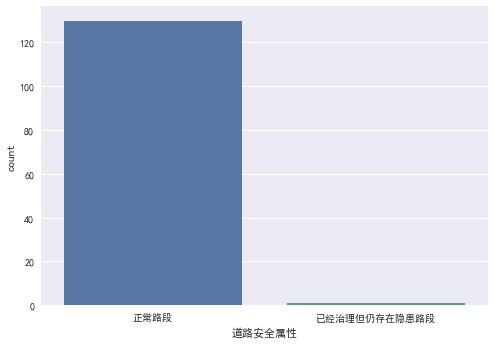

In [8]:
#道路安全属性
sns.countplot(data_attach_notnull['道路安全属性'])
sum(data_attach_notnull['道路安全属性'].isnull())
data_attach_notnull['道路安全属性'].fillna('正常路段',inplace=True)

D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


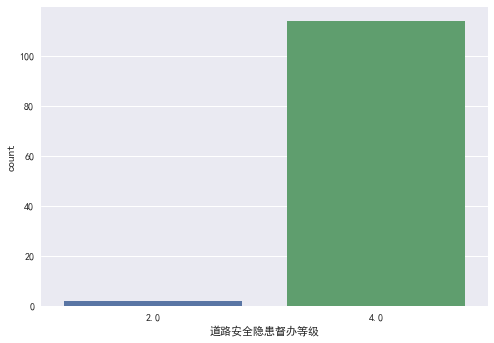

In [9]:
#道路安全隐患督办等级
sns.countplot(data_attach_notnull['道路安全隐患督办等级'])
sum(data_attach_notnull['道路安全隐患督办等级'].isnull())
data_attach_notnull['道路安全隐患督办等级'].fillna(4.0,inplace=True)

In [10]:
#将事故发生时间化解为是否节假日，是否白天
isHolidayFrom140101To161231 = pd.read_excel('isHolidayFrom140101To161231_17.10.23_re.xlsx')
date = pd.DataFrame(data_attach_notnull['事故发生时间'])
date = pd.to_datetime(date['事故发生时间'])

def getAccidentDayWithoutHour(i):
    day = str(i.day)
    month = str(i.month)
    if i.day<10:
        day = '0'+day
    if i.month<10:
        month = '0'+month
    theDate = str(i.year)+month+day
    return theDate

accidentDayWithoutHour = pd.DataFrame(date.apply(getAccidentDayWithoutHour))
isHolidays = list()
for i in accidentDayWithoutHour['事故发生时间']:
    isH = isHolidayFrom140101To161231[isHolidayFrom140101To161231.date_day==int(i)]['isHoliday'].iloc[0]
    isHolidays.append(isH)
    
isHolidays = pd.DataFrame(isHolidays)
isHolidays['index'] = range(len(isHolidays))
isHolidays = isHolidays.set_index(['index'])
data_attach_notnull.insert(loc=1,column='是否节假日',value=isHolidays)

del isHolidayFrom140101To161231,accidentDayWithoutHour,isHolidays,isH

#添加是否白天属性
#白天或夜晚
isDayorNight = list()
for i in date:
    if i.hour>=19 or i.hour<7:
        isDayorNight.append('夜晚')
    else:
        isDayorNight.append('白天')
isDayorNight = pd.Series(isDayorNight)

data_attach_notnull.insert(2,'是否白天',isDayorNight)

del isDayorNight,date
data_attach_notnull.drop(['事故发生时间'],axis=1,inplace=True)

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


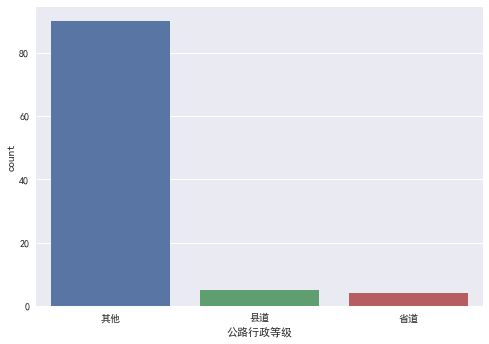

In [11]:
#公路行政等级
sns.countplot(data_attach_notnull['公路行政等级'])
data_attach_notnull['公路行政等级'].fillna('其他',inplace=True)

D:\ProgramFiles\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


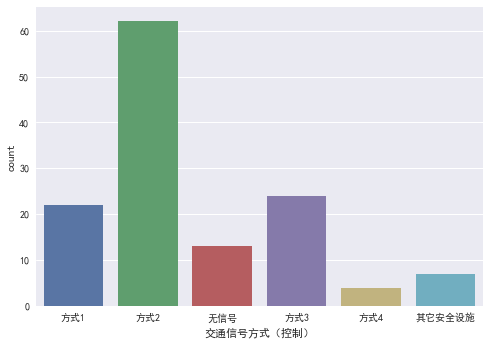

In [12]:
#交通信号方式（控制）
sns.countplot(data_attach_notnull['交通信号方式（控制）'])
data_attach_notnull.loc[data_attach_notnull['交通信号方式（控制）']==345,'交通信号方式（控制）']='方式1'
data_attach_notnull.loc[data_attach_notnull['交通信号方式（控制）']==45,'交通信号方式（控制）']='方式2'
data_attach_notnull.loc[data_attach_notnull['交通信号方式（控制）']==456,'交通信号方式（控制）']='方式3'
data_attach_notnull.loc[data_attach_notnull['交通信号方式（控制）']==3456,'交通信号方式（控制）']='方式4'
sns.countplot(data_attach_notnull['交通信号方式（控制）'])

In [13]:
j = 0
for i in range(len(data_attach_notnull.columns)): 
    j += 1
    odds = sum(data_attach_notnull[data_attach_notnull.columns[i]].isnull())/len(data_attach_notnull)
    print('%s:%s'%((data_attach_notnull.columns)[i],odds),end='     ')
    if j%5==0:
        print()

中央隔离设施:0.0     是否节假日:0.0     是否白天:0.0     事故地点:0.0     事故多发点段:0.0     
事故类型:0.0     交通信号方式（控制）:0.0     交通标志标线完善:0.0     公路行政等级:0.0     公里数:0.0     
其他交通安全设施不全:0.0     单向路宽:0.348484848485     双向路宽:0.666666666667     在道路横断面位置:0.0     地形:0.0     
天气:0.0     所辖乡镇:0.0     损坏机动车数:0.0     损坏非机动车数:0.0     星期:0.0     
是否运载危险物品:0.0     涉外事故:0.0     照明条件:0.0     现场:0.0     能见度:0.0     
行政区划:0.0     路侧防护设施类型:0.0     路口路段类型:0.0     路号:0.0     路表情况:0.0     
路面状况:0.0     路面结构:0.0     路面附着系数:0.0     道路安全属性:0.0     道路安全隐患督办等级:0.0     
道路物理隔离:0.0     道路类型:0.0     道路线型:0.0     长下坡路段:0.0     

In [14]:
#暂时删除 {单向路宽，双向路宽}
data_attach_notnull.drop(['单向路宽','双向路宽'],inplace=True,axis=1)
#设置编号
data_attach_notnull['index']=range(len(data_attach_notnull))
data_attach_notnull.set_index(data_attach_notnull['index'],inplace=True)
data_attach_notnull.drop(['index'],axis=1,inplace=True)

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
len(data_attach_notnull.columns)

37

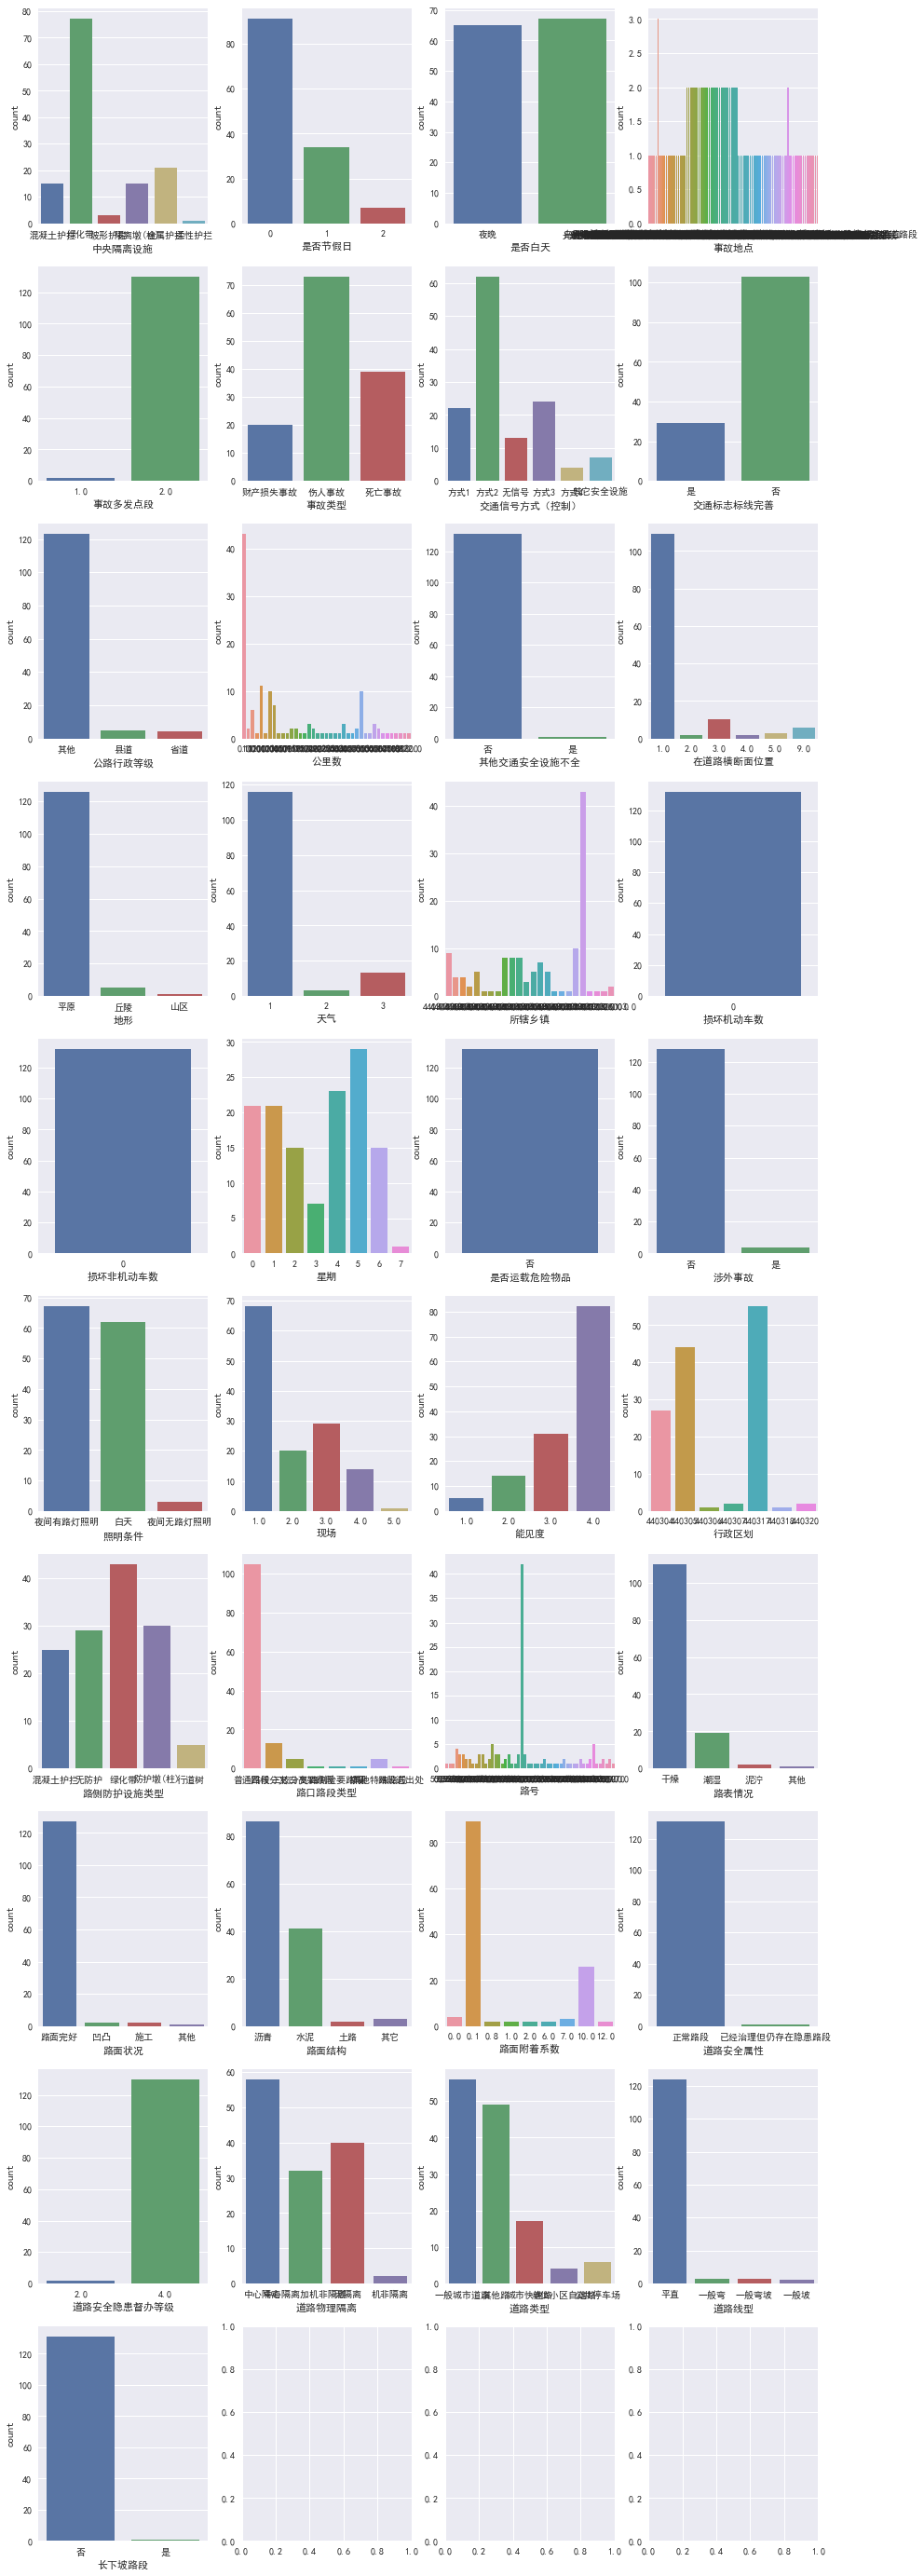

In [23]:
fig,axes = plt.subplots(10,4,figsize=(15,50))
i=0
j=0
for fe in data_attach_notnull.columns:
    sns.countplot(data_attach_notnull[fe],ax=axes[i,j])
    j+=1
    if j==4:
        j=0
        i += 1

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


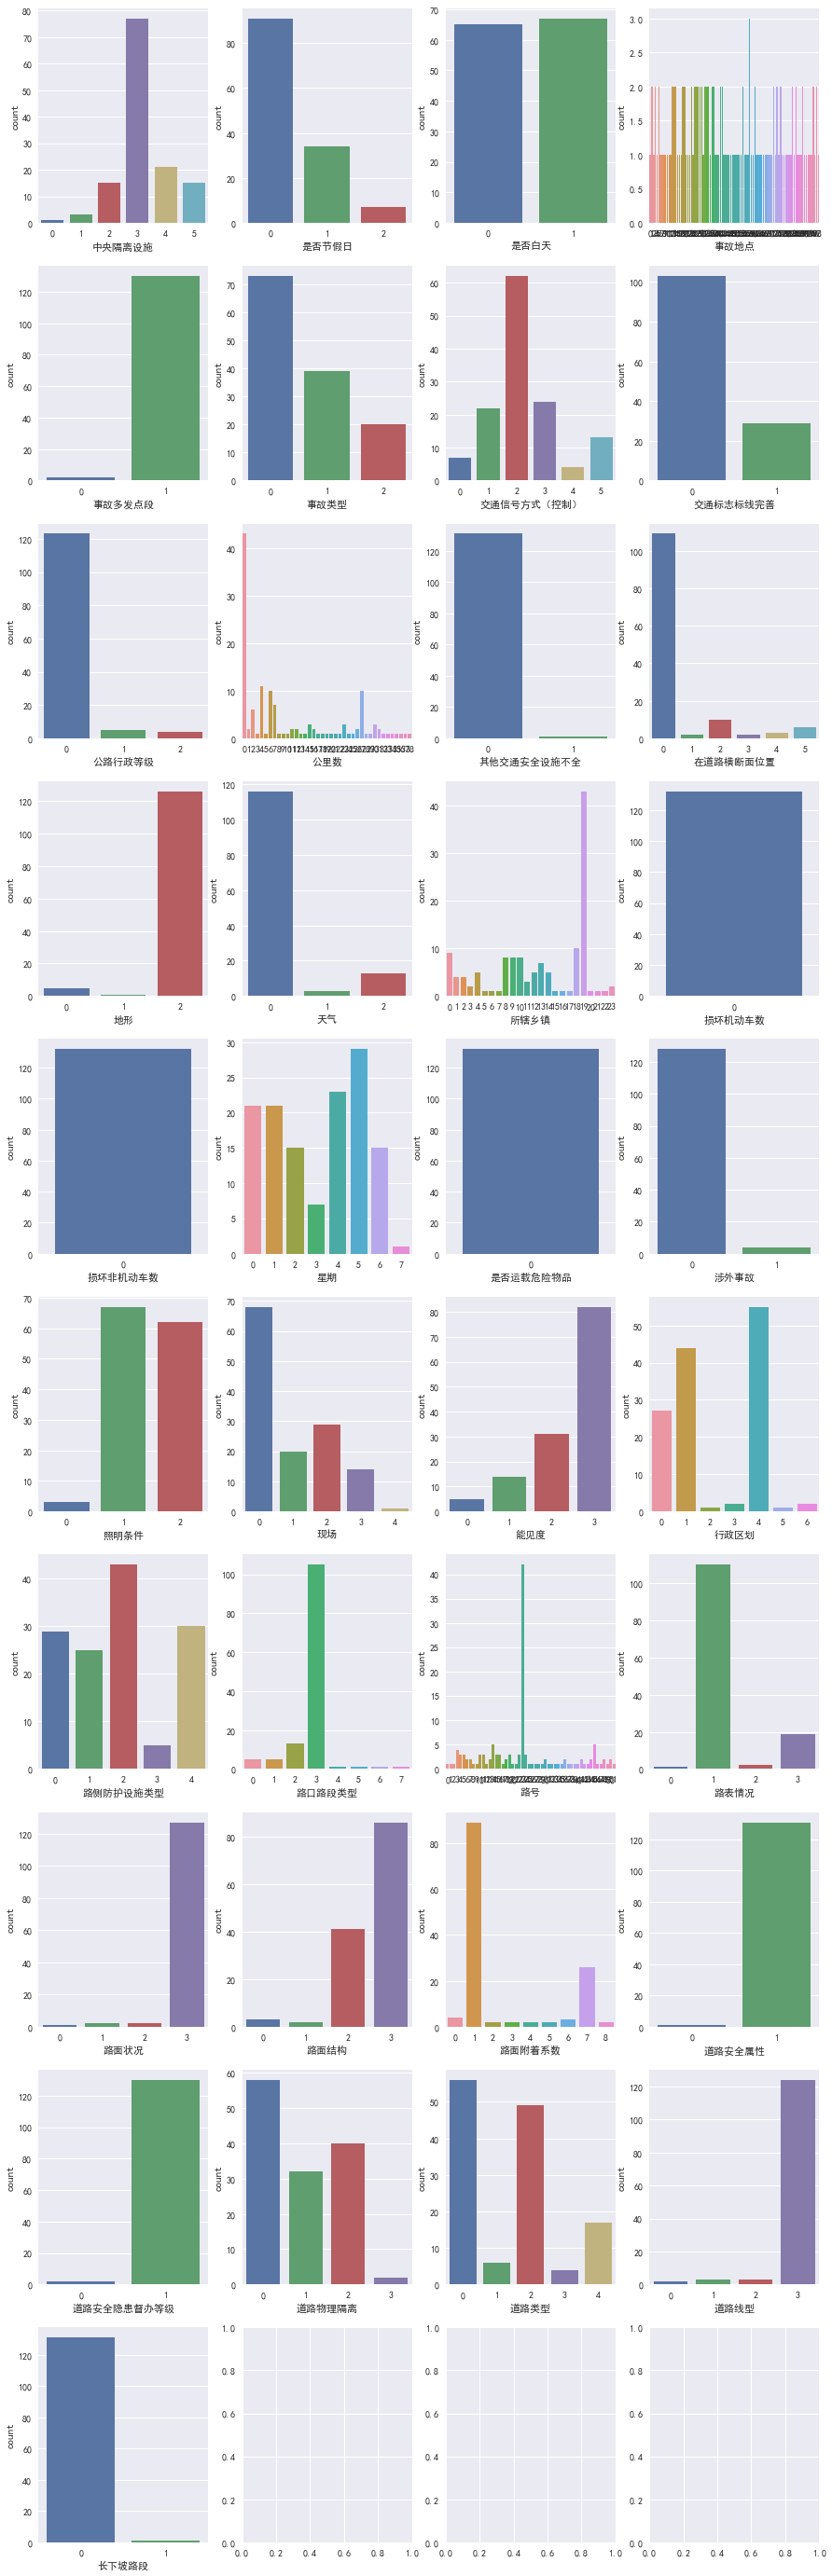

In [16]:
#根据countplot图删除一些无用特征
from sklearn import preprocessing
# data_attach_notnull.drop(['index'],axis=1,inplace=True)
columnsToNum = list(data_attach_notnull.columns)
dataSet_toNum = pd.DataFrame()
for i in columnsToNum:
    dataSet_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull[i])
    
fig,axes = plt.subplots(10,4,figsize=(15,50))
i=0
j=0
for fe in dataSet_toNum.columns:
    sns.countplot(dataSet_toNum[fe],ax=axes[i,j])
    j+=1
    if j==4:
        j=0
        i += 1
        
data_attach_notnull.drop(['事故地点','损坏机动车数','损坏非机动车数','是否运载危险物品','路号'],\
                         axis=1,inplace=True)

In [17]:
data_attach_notnull.to_excel('dataOtherFactors__attach_notnul_17.11.11.xlsx')

# 2. 生成训练集和测试集

In [6]:
from sklearn import preprocessing

from sklearn.ensemble import RandomForestClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV

D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [42]:
data_attach_notnull = pd.read_excel('dataOtherFactors__attach_notnul_17.11.11.xlsx')

In [43]:
data_attach_notnull.drop(['所辖乡镇','星期','涉外事故','现场','行政区划','现场','公里数'],axis=1,inplace=True)

In [44]:
data_attach_notnull.columns

Index(['index', '中央隔离设施', '是否节假日', '是否白天', '事故多发点段', '事故类型', '交通信号方式（控制）',
       '交通标志标线完善', '公路行政等级', '其他交通安全设施不全', '在道路横断面位置', '地形', '天气', '照明条件',
       '能见度', '路侧防护设施类型', '路口路段类型', '路表情况', '路面状况', '路面结构', '路面附着系数', '道路安全属性',
       '道路安全隐患督办等级', '道路物理隔离', '道路类型', '道路线型', '长下坡路段'],
      dtype='object')

In [32]:
#转换为数字
# columnsToNum = list(data_attach_notnull.columns)
# dataSet_toNum = pd.DataFrame()
# for i in columnsToNum:
#     dataSet_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull[i])
    
# fig,axes = plt.subplots(8,4,figsize=(15,50))
# i=0
# j=0
# for fe in dataSet_toNum.columns:
#     sns.countplot(dataSet_toNum[fe],ax=axes[i,j])
#     j+=1
#     if j==4:
#         j=0
#         i += 1

In [45]:
#生成训练集和测试集


data_attach_notnull['index'] = range(len(data_attach_notnull))
data_attach_notnull_test = data_attach_notnull.sample(frac=0.2,replace=False)
#获取训练集
index = ~data_attach_notnull.index.isin(data_attach_notnull_test['index'])
data_attach_notnull_train = data_attach_notnull[index]


#转换为数字
data_attach_notnull.drop(['index'],axis=1,inplace=True)
data_attach_notnull_train.drop(['index'],axis=1,inplace=True)
data_attach_notnull_test.drop(['index'],axis=1,inplace=True)
columnsToNum = list(data_attach_notnull_train.columns)

set_toNum = pd.DataFrame()
for i in columnsToNum:
    set_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull[i])


trainSet_toNum = pd.DataFrame()
for i in columnsToNum:
    trainSet_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull_train[i])

# columnsToNum = list(data_attach_notnull_test.columns)
testSet_toNum = pd.DataFrame()
for i in columnsToNum:
    testSet_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull_test[i])

del data_attach_notnull_train,data_attach_notnull_test,data_attach_notnull

#统一训练集、测试集格式
train_features = trainSet_toNum.drop(['事故类型'],axis=1).columns

x_all =np.array(set_toNum.drop(['事故类型'],axis=1)) 
y_all = np.array(set_toNum['事故类型'])
y = np.zeros((len(y_all),len(set_toNum.groupby('事故类型')) ))
for i in range(len(y_all)):
    y[i][y_all[i]] = 1
y_all = np.mat(y)
x_all = np.mat(x_all)
# y_all = np.mat(y_all)

x_train =np.array(trainSet_toNum.drop(['事故类型'],axis=1)) 
y_train = np.array(trainSet_toNum['事故类型'])
y = np.zeros((len(y_train),len(trainSet_toNum.groupby('事故类型')) ))
for i in range(len(y_train)):
    y[i][y_train[i]] = 1
y_train = np.mat(y)
x_train = np.mat(x_train)
# y_train = np.mat(y_train)


x_test =np.array(testSet_toNum.drop(['事故类型'],axis=1)) 
y_test = np.array(testSet_toNum['事故类型'])
y = np.zeros((len(y_test),len(testSet_toNum.groupby('事故类型')) ))
for i in range(len(y_test)):
    y[i][y_test[i]] = 1
y_test = np.mat(y)
x_test = np.mat(x_test)
# y_test = np.mat(y_test)


del y,trainSet_toNum,testSet_toNum

D:\ProgramFiles\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [46]:
print('数据集维度：%s'%str(x_all.shape))
print('数据集标签维度：%s'%str(y_all.shape))
print('训练集维度：%s'%str(x_train.shape))
print('训练集标签维度：%s'%str(y_train.shape))
print('测试集维度：%s'%str(x_test.shape))
print('测试集标签维度：%s'%str(y_test.shape))

数据集维度：(132, 25)
数据集标签维度：(132, 3)
训练集维度：(106, 25)
训练集标签维度：(106, 3)
测试集维度：(26, 25)
测试集标签维度：(26, 3)


In [47]:
forest = RandomForestClassifier(max_features='sqrt',random_state=10,oob_score=True)
forest.fit(x_all,y_all)
print(forest.oob_score_)

0.79797979798


D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\ProgramFiles\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:444: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [48]:
#turn n_estimator
param_test1 = {'n_estimators':list(range(20,200,10))}

forest = GridSearchCV(estimator=RandomForestClassifier(max_features='sqrt',random_state=10),\
                     param_grid=param_test1,scoring='roc_auc',cv=5)
forest.fit(x_all,y_all)
forest.grid_scores_,forest.best_params_,forest.best_score_#cv_results_

# forest = RandomForestClassifier(n_estimators=115,)
# forest.fit(x_train,y_train)
# print (forest.oob_score_)
# y_pred= forest.predict(x_test)
# print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_pred) )

([mean: 0.84084, std: 0.15531, params: {'n_estimators': 20},
  mean: 0.85316, std: 0.14817, params: {'n_estimators': 30},
  mean: 0.84409, std: 0.15951, params: {'n_estimators': 40},
  mean: 0.84757, std: 0.15180, params: {'n_estimators': 50},
  mean: 0.85391, std: 0.14407, params: {'n_estimators': 60},
  mean: 0.85641, std: 0.14463, params: {'n_estimators': 70},
  mean: 0.85663, std: 0.14928, params: {'n_estimators': 80},
  mean: 0.85512, std: 0.15081, params: {'n_estimators': 90},
  mean: 0.85808, std: 0.14967, params: {'n_estimators': 100},
  mean: 0.85964, std: 0.14539, params: {'n_estimators': 110},
  mean: 0.85674, std: 0.14858, params: {'n_estimators': 120},
  mean: 0.85704, std: 0.14938, params: {'n_estimators': 130},
  mean: 0.85872, std: 0.14948, params: {'n_estimators': 140},
  mean: 0.86184, std: 0.14530, params: {'n_estimators': 150},
  mean: 0.86083, std: 0.14644, params: {'n_estimators': 160},
  mean: 0.86089, std: 0.14379, params: {'n_estimators': 170},
  mean: 0.86307,

In [49]:
#n_estimators=20，
#'max_depth':list(range(2,18,1))
param_test2 = {'min_samples_split':list(range(2,30,2))}#, 
forest = GridSearchCV(estimator=RandomForestClassifier(n_estimators=180,\
                                                    max_features='sqrt',oob_score=True,\
                                                    random_state=10),\
                     param_grid = param_test2,scoring='roc_auc',cv=5,iid=False)
forest.fit(x_all,y_all)
forest.grid_scores_,forest.best_params_,forest.best_score_
#max_depth,min_samples_split使用默认值

([mean: 0.86196, std: 0.14236, params: {'min_samples_split': 2},
  mean: 0.84218, std: 0.13694, params: {'min_samples_split': 4},
  mean: 0.83056, std: 0.12858, params: {'min_samples_split': 6},
  mean: 0.82734, std: 0.12437, params: {'min_samples_split': 8},
  mean: 0.81210, std: 0.12139, params: {'min_samples_split': 10},
  mean: 0.79673, std: 0.11982, params: {'min_samples_split': 12},
  mean: 0.78101, std: 0.12238, params: {'min_samples_split': 14},
  mean: 0.77514, std: 0.12225, params: {'min_samples_split': 16},
  mean: 0.76321, std: 0.11390, params: {'min_samples_split': 18},
  mean: 0.74384, std: 0.10854, params: {'min_samples_split': 20},
  mean: 0.72951, std: 0.12458, params: {'min_samples_split': 22},
  mean: 0.72047, std: 0.12749, params: {'min_samples_split': 24},
  mean: 0.71260, std: 0.12906, params: {'min_samples_split': 26},
  mean: 0.70330, std: 0.12845, params: {'min_samples_split': 28}],
 {'min_samples_split': 2},
 0.8619563228150259)

In [50]:
#测试oob_score_
rf1 = RandomForestClassifier(n_estimators= 180,max_features='sqrt' ,min_samples_split=2,oob_score=True, random_state=10)
rf1.fit(x_all,y_all)
print (rf1.oob_score_)

0.843434343434


In [51]:
param_test3 = {'min_samples_split':list(range(2,10,1)),\
               'min_samples_leaf':list(range(1,10,1))}
gsearch3 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 180,
                                  max_features='sqrt' ,oob_score=True, random_state=10),
   param_grid = param_test3, scoring='roc_auc',iid=False, cv=5)
gsearch3.fit(x_all,y_all)
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.86196, std: 0.14236, params: {'min_samples_leaf': 1, 'min_samples_split': 2},
  mean: 0.85224, std: 0.14465, params: {'min_samples_leaf': 1, 'min_samples_split': 3},
  mean: 0.84218, std: 0.13694, params: {'min_samples_leaf': 1, 'min_samples_split': 4},
  mean: 0.83626, std: 0.14129, params: {'min_samples_leaf': 1, 'min_samples_split': 5},
  mean: 0.83056, std: 0.12858, params: {'min_samples_leaf': 1, 'min_samples_split': 6},
  mean: 0.83468, std: 0.12865, params: {'min_samples_leaf': 1, 'min_samples_split': 7},
  mean: 0.82734, std: 0.12437, params: {'min_samples_leaf': 1, 'min_samples_split': 8},
  mean: 0.81264, std: 0.12380, params: {'min_samples_leaf': 1, 'min_samples_split': 9},
  mean: 0.82485, std: 0.13324, params: {'min_samples_leaf': 2, 'min_samples_split': 2},
  mean: 0.82485, std: 0.13324, params: {'min_samples_leaf': 2, 'min_samples_split': 3},
  mean: 0.82485, std: 0.13324, params: {'min_samples_leaf': 2, 'min_samples_split': 4},
  mean: 0.81401, std: 0.13618, p

In [52]:
param_test4 = {'max_features':list(range(1,15,1))}
gsearch4 = GridSearchCV(estimator = RandomForestClassifier(n_estimators= 180,\
                                    max_features='sqrt' ,min_samples_leaf=1, min_samples_split=2,oob_score=True, random_state=10),
   param_grid = param_test4, scoring='roc_auc',iid=False, cv=5)
gsearch4.fit(x_all,y_all)
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.84323, std: 0.16554, params: {'max_features': 1},
  mean: 0.85759, std: 0.14593, params: {'max_features': 2},
  mean: 0.85547, std: 0.15171, params: {'max_features': 3},
  mean: 0.85706, std: 0.15231, params: {'max_features': 4},
  mean: 0.86196, std: 0.14236, params: {'max_features': 5},
  mean: 0.87179, std: 0.13854, params: {'max_features': 6},
  mean: 0.85935, std: 0.15358, params: {'max_features': 7},
  mean: 0.85968, std: 0.14897, params: {'max_features': 8},
  mean: 0.85752, std: 0.15142, params: {'max_features': 9},
  mean: 0.85847, std: 0.14696, params: {'max_features': 10},
  mean: 0.84801, std: 0.15860, params: {'max_features': 11},
  mean: 0.86475, std: 0.14732, params: {'max_features': 12},
  mean: 0.86353, std: 0.14069, params: {'max_features': 13},
  mean: 0.86321, std: 0.14884, params: {'max_features': 14}],
 {'max_features': 6},
 0.8717880610658819)

In [62]:
#测试oob_score_
rf1 = RandomForestClassifier(n_estimators= 100,\
                             max_features='sqrt' ,min_samples_leaf=1, min_samples_split=2,\
                             oob_score=True, random_state=10)
rf1.fit(x_all,y_all)
print (rf1.oob_score_)

0.843434343434


In [39]:
#test
# np.argmax(rf1.predict(x_test),axis=1)
# np.mat(testSet_toNum_y)
# np.argmax(y_test,axis=1,).reshape( (1,len(np.argmax(y_test,axis=1,))) )


corr_pre_test = np.equal(np.argmax(rf1.predict(x_all),axis=1),\
                    np.argmax(y_all,axis=1,).reshape( (1,len(np.argmax(y_all,axis=1,))) )\
                   )
acc_test = np.mean(corr_pre_test)

print('测试集准确率：%s'%acc_test)

测试集准确率：1.0


In [40]:
# corr_pre_train = np.equal(np.argmax(forest.predict(x_train),axis=1),\
#                     np.argmax(y_train,axis=1,).reshape( (1,len(np.argmax(y_train,axis=1,))) )\
#                    )
# acc_train = np.mean(corr_pre_train)
# print('训练集准确率：%s'%acc_train)

In [63]:
importances = rf1.feature_importances_
indice = np.argsort(importances)[::-1]#按照索引对应值的大小对索引排序
for i in range(x_train.shape[1]):
    print('%2d) %-*s %f'%(i+1, 30, train_features[indice[i]], importances[indice[i]]))

 1) 交通信号方式（控制）                     0.108561
 2) 路侧防护设施类型                       0.095822
 3) 中央隔离设施                         0.091041
 4) 能见度                            0.080579
 5) 道路物理隔离                         0.076298
 6) 道路类型                           0.070012
 7) 路面附着系数                         0.064648
 8) 路口路段类型                         0.052682
 9) 是否节假日                          0.049305
10) 照明条件                           0.043221
11) 是否白天                           0.037759
12) 路面结构                           0.037153
13) 在道路横断面位置                       0.030706
14) 路表情况                           0.028962
15) 天气                             0.028636
16) 公路行政等级                         0.026475
17) 交通标志标线完善                       0.022573
18) 路面状况                           0.020812
19) 地形                             0.013895
20) 道路线型                           0.010466
21) 事故多发点段                         0.003651
22) 道路安全属性                         0.002687
23) 长下坡路段                       

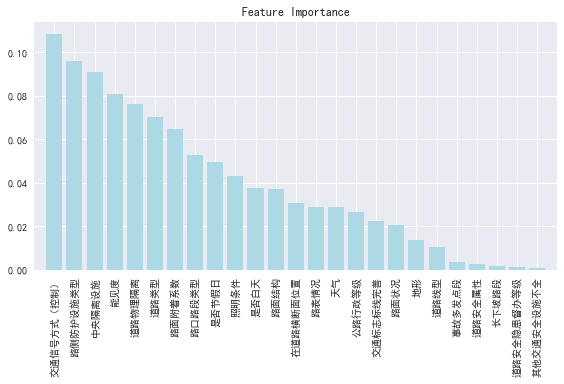

In [64]:
plt.title('Feature Importance')
plt.bar(range(x_train.shape[1]),
       importances[indice],
       color='lightblue',
       align='center')
plt.xticks(range(x_train.shape[1]),
          train_features[indice],
           rotation=90)
plt.xlim([-1,x_train.shape[1]])
plt.tight_layout()
plt.show()

## 2.1 删除星期

In [138]:
data_attach_notnull = pd.read_excel('dataOtherFactors__attach_notnul_17.11.11.xlsx')
data_attach_notnull.drop(['星期'],axis=1,inplace=True)

In [139]:
#生成训练集和测试集

data_attach_notnull['index'] = range(len(data_attach_notnull))

#转换为数字
data_attach_notnull.drop(['index'],axis=1,inplace=True)
columnsToNum = list(data_attach_notnull.columns)

set_toNum = pd.DataFrame()
for i in columnsToNum:
    set_toNum[i] = preprocessing.LabelEncoder().fit_transform(data_attach_notnull[i])

# del data_attach_notnull

#统一训练集、测试集格式
train_features = set_toNum.drop(['事故类型'],axis=1).columns

x_all =np.array(set_toNum.drop(['事故类型'],axis=1)) 
y_all = np.array(set_toNum['事故类型'])
y = np.zeros((len(y_all),len(set_toNum.groupby('事故类型')) ))
for i in range(len(y_all)):
    y[i][y_all[i]] = 1
y_all = np.mat(y)
x_all = np.mat(x_all)

del y

In [116]:
rf1 = RandomForestClassifier(n_estimators=27,max_features=4 ,min_samples_split=2,\
                             min_samples_leaf=1,\
                             oob_score=True, random_state=10)
rf1.fit(x_all,y_all)
print (rf1.oob_score_)

0.863636363636


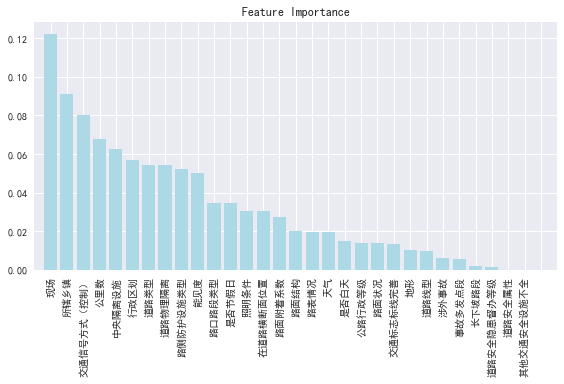

In [119]:
importances = rf1.feature_importances_
indice = np.argsort(importances)[::-1]#按照索引对应值的大小对索引排序
# for i in range(x_all.shape[1]):
#     print('%2d) %-*s %f'%(i+1, 30, train_features[indice[i]], importances[indice[i]]))
    
plt.title('Feature Importance')
plt.bar(range(x_all.shape[1]),
       importances[indice],
       color='lightblue',
       align='center')
plt.xticks(range(x_train.shape[1]),
          train_features[indice],
           rotation=90)
plt.xlim([-1,x_train.shape[1]])
plt.tight_layout()
plt.show()

## 2.2 依照2.1结果进行相关分析

In [120]:
data_attach_notnull = pd.read_excel('dataOtherFactors__attach_notnul_17.11.11.xlsx')
data_attach_notnull.drop(['星期'],axis=1,inplace=True)

### 事故类型与现场关系

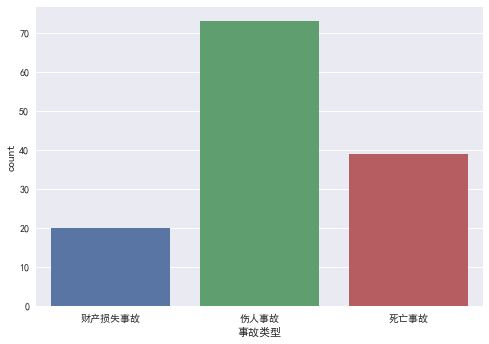

In [140]:
sns.countplot(data_attach_notnull['事故类型'])

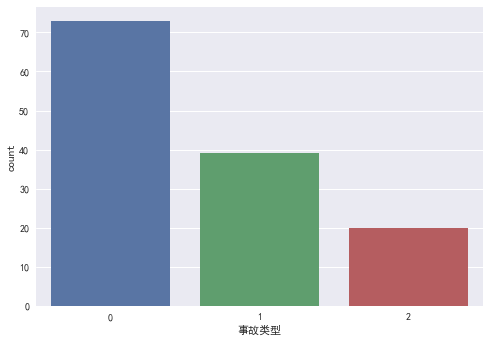

In [141]:
sns.countplot(set_toNum['事故类型'])

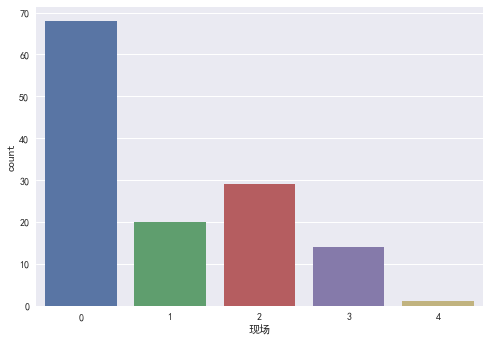

In [146]:
data_attach_notnull['现场'] = data_attach_notnull['现场']-1
sns.countplot(data_attach_notnull['现场'])

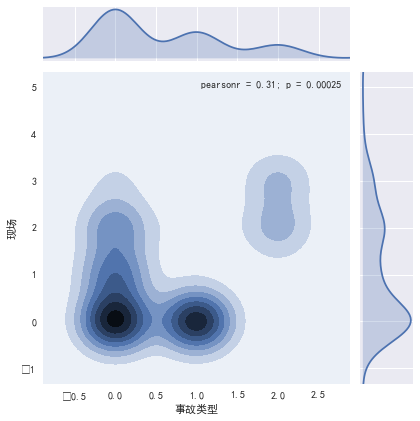

In [147]:
# parallel_coordinates(data_attach_notnull[['现场','事故类型']], '事故类型')
# sns.jointplot(x="现场", y="事故类型", data=set_toNum[['现场','事故类型']], \
#               stat_func=stats.pearsonr)
sns.jointplot(x="事故类型", y="现场", data=set_toNum[['现场','事故类型']], kind="kde")#相交的 KDE 图

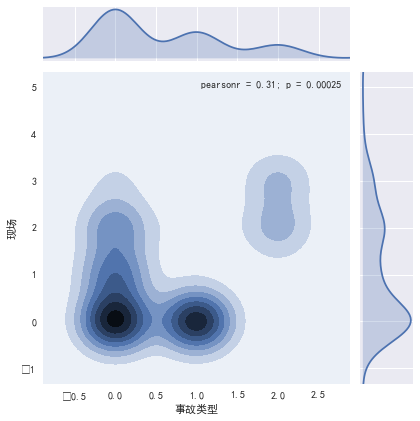

In [148]:
data_attach_notnull['现场'] = data_attach_notnull['现场']+1
sns.jointplot(x="事故类型", y="现场", data=set_toNum[['现场','事故类型']], kind="kde")#相交的 KDE 图

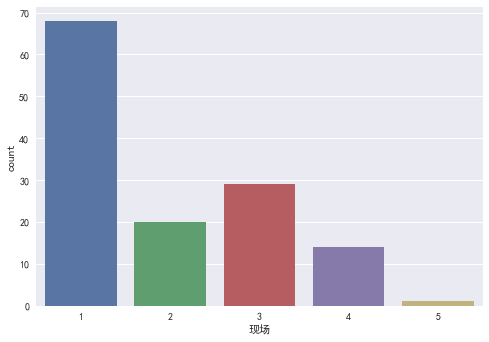

In [149]:
sns.countplot(data_attach_notnull['现场'])

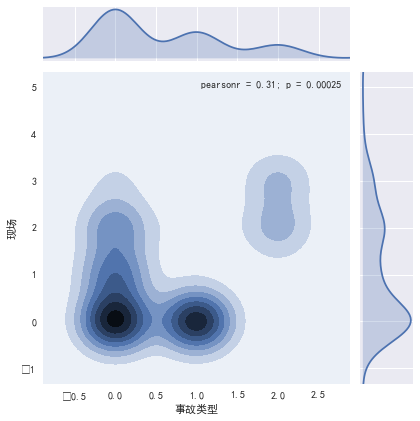

In [150]:
sns.jointplot(x="事故类型", y="现场", data=set_toNum[['现场','事故类型']], kind="kde")#相交的 KDE 图

### 所辖乡镇与事故类型

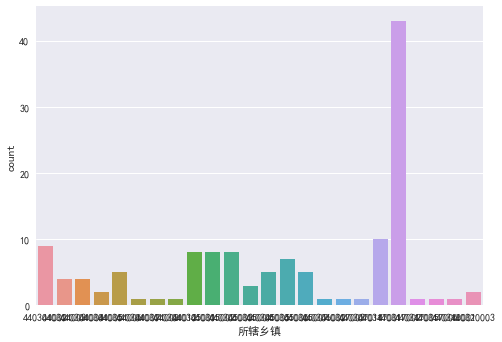

In [151]:
sns.countplot(data_attach_notnull['所辖乡镇'])

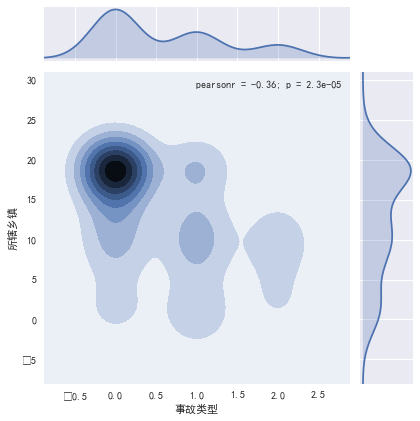

In [152]:
sns.jointplot(x="事故类型", y="所辖乡镇", data=set_toNum[['所辖乡镇','事故类型']], kind="kde")#相交的 KDE 图

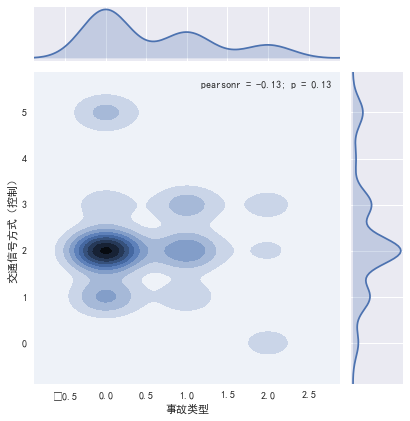

In [158]:
sns.jointplot(y="交通信号方式（控制）", x="事故类型", data=set_toNum[['交通信号方式（控制）','事故类型']], \
              kind='kde')